In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import QRC_construction.Dataset as DT
import QRC_construction.Optimization as OP
import QRC_construction.TrainPredict as TP

%matplotlib inline

---
---
---

# 2. QRC on Classical Datasets


Here we test our QRC on two classical datasets.

---
---

## 2.1. NARMA

NARMA[n] has sliding window size n, i.e. to predict y(t-1), we need the last n past values of y. 

What we expect: if the reservoir's effective memory < n, NRMSE will jump above 1. 

NARMA[n] mathematical expression:
$$y(t+1) = 0.3y(t) + 0.05y(t)[y(t) + y(t-1) + ... + y(t-n)] + 1.5u(t-10)u(t) + 0.1$$

$y(0), y(1), ... ,y(n-1) $ are initialized to 0, the recurrence is only valid from $t \geq n$ ;  good to discard the first 10n (e.g. 30 for n=3) steps in general (washout).

#### General parameters

In [3]:
T_narma = 2500

# train/test split A
T_narma_train_A = 2000
T_narma_test_A = 10
T_narma_A = T_narma_train_A + T_narma_test_A

# train/test split B
T_narma_train_B = 1000
T_narma_test_B = 10
T_narma_B = T_narma_train_B + T_narma_test_B

### NARMA3

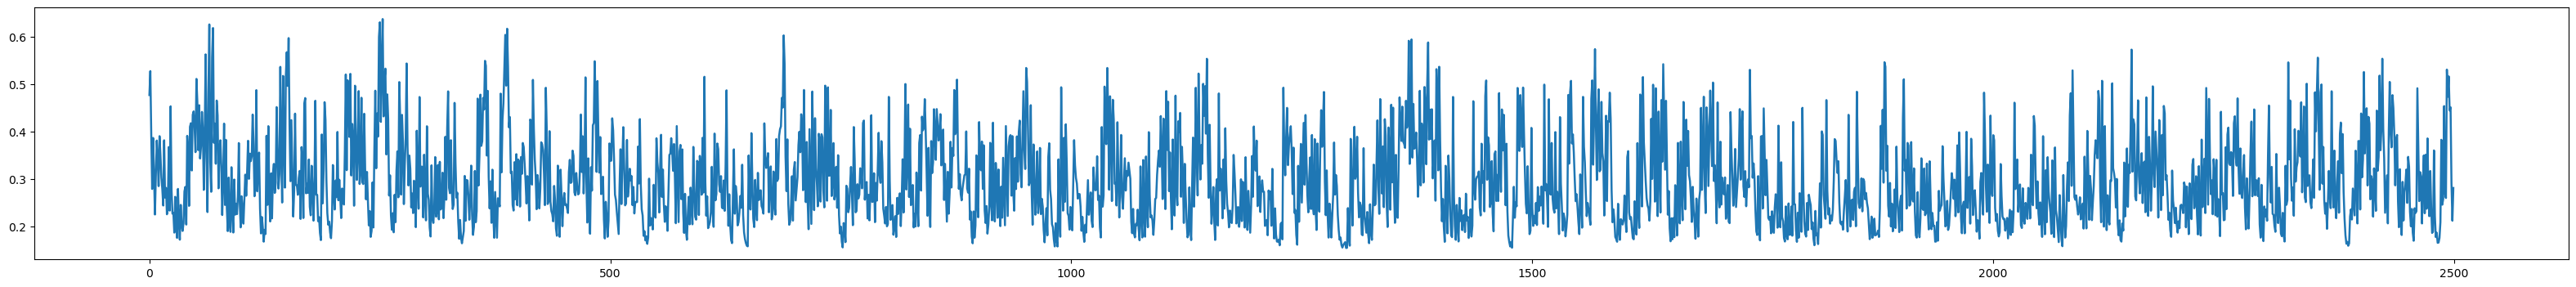

In [42]:
y_narma3 = DT.narma_dataset(T_narma, order=3, seed=0)
plt.figure(figsize=(40, 4))
plt.plot(y_narma3, label="NARMA3", lw=1.8)
#plt.title(f"NARMA3")
plt.show()

### NARMA5

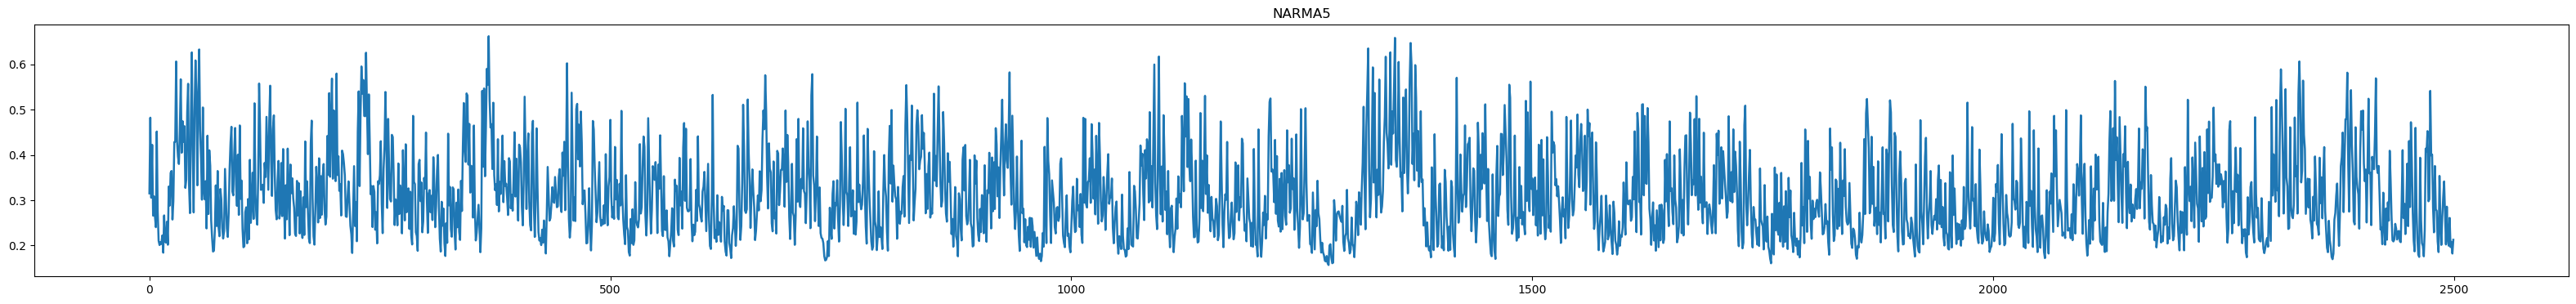

In [5]:
y_narma5 = DT.narma_dataset(T_narma, order=5, seed=0)
plt.figure(figsize=(40, 4))
plt.plot(y_narma5, label="NARMA5", lw=1.8)
plt.title(f"NARMA5")
plt.show()

### Grid Search on:
- Reservoir type (G1, G2, G3, Ising, MG, D)
- Measurement basis choice (Full-axes, Reduced-axes, Single-axis (Y))
- Sliding window size (2,3,4)
- Extra qubits (0,1)

### NARMA3

T_train = 2000
T_test = 10

In [10]:
narma3_LR_A, y_true, W, X_train, Y_train = TP.predict_linear_regression(y_narma3[:T_narma_A], T_narma_train_A, T_narma_test_A, 3)

In [ ]:
narma3_best_params, narma3_worst_params = OP.find_optimal_res_sliding_window_classical_dataset(y_narma3[:T_narma_A], T_narma_train_A, T_narma_test_A, nb_input_qubits = 1, 
                                                                                                sliding_window_size_range=(2,4), 
                                                                                                nb_extra_qubits_range=(0,1), 
                                                                                                seeds=[0,1,2], 
                                                                                                try_res_G=True,
                                                                                                try_res_MG=True,
                                                                                                try_res_D=True,
                                                                                                try_res_ISING=True,
                                                                                                try_Rz=False,
                                                                                                meas_SZ = False,
                                                                                                depths_G=[3, 10])

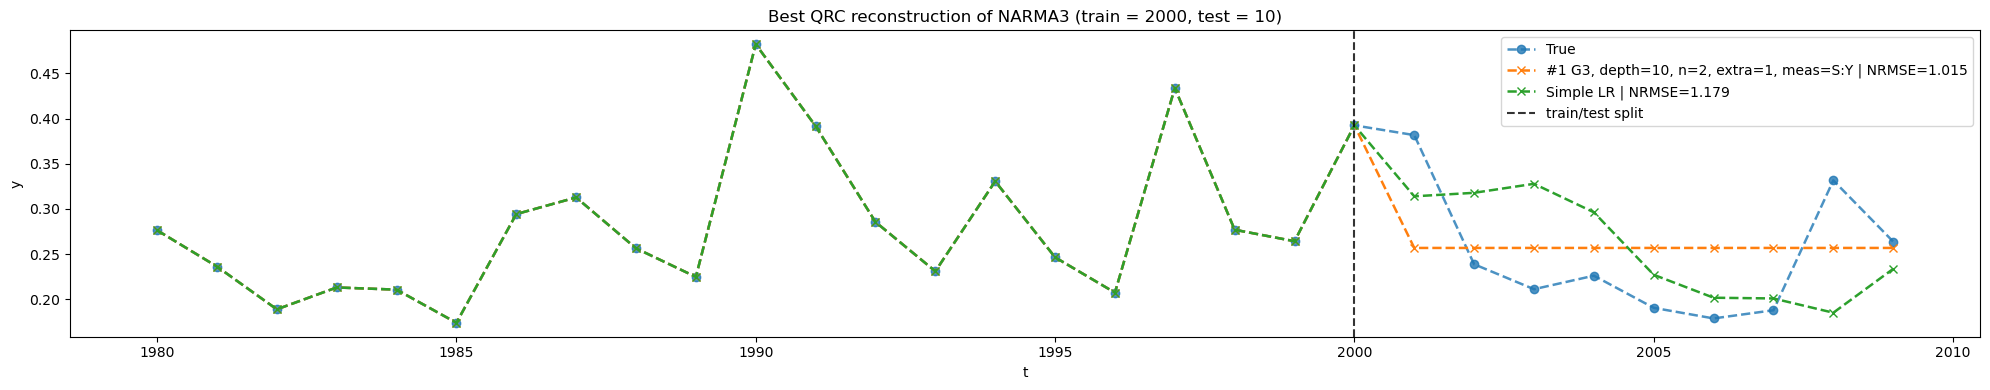

In [15]:
file_path_narma3 = "datas/Classical_Datasets/narma/All/train_2000_test10_3.txt"
narma3_best_params, narma3_worst_params = OP.recompute_best_worst_from_logfile(file_path_narma3, y_narma3[:T_narma_A], T_narma_train_A, T_narma_test_A, nb_input_qubits = 1, k=1, is_dataset_classical=True) 
OP.plot_ranked_predictions(narma3_best_params[:1],T_train=T_narma_train_A,title="Best QRC reconstruction of NARMA3 (train = 2000, test = 10)", steps_training_included=20, y_lr=narma3_LR_A)

### Grid Search on:
- Reservoir type (G1, G2, G3)
- Reservoir depth (3, 5, 10)
- Measurement basis choice (Full-axes, Reduced-axes, Single-axis (X + Y))
- Sliding window size (2,3,4)
- Extra qubits (0,1)
- Rz encoding

### NARMA3

In [ ]:
narma3_best_params_A, narma3_worst_params_A = OP.find_optimal_res_sliding_window_classical_dataset(y_narma3[:T_narma_A], T_narma_train_A, T_narma_test_A, nb_input_qubits = 1, 
                                                                                                sliding_window_size_range=(2,4), 
                                                                                                nb_extra_qubits_range=(0,1), 
                                                                                                seeds=[0,1], 
                                                                                                try_res_G=True,
                                                                                                try_res_MG=False,
                                                                                                try_res_D=False,
                                                                                                try_res_ISING=False,
                                                                                                try_Rz=True,
                                                                                                depths_G=[3, 5, 10])

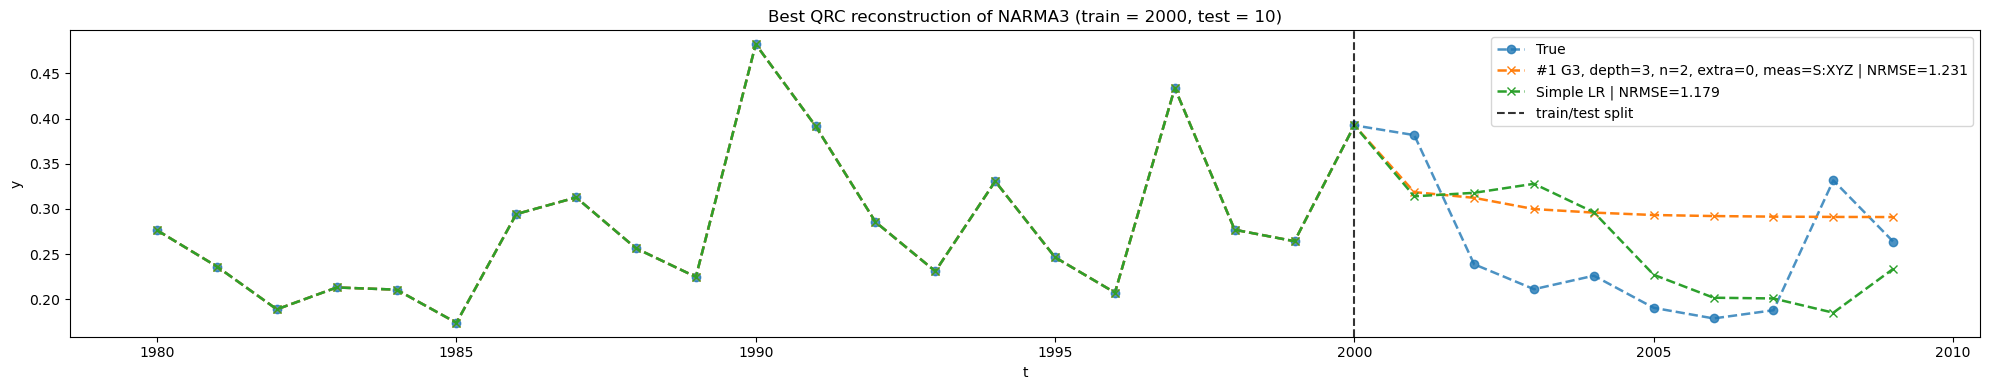

In [16]:
file_path_narma3_A = "datas/Classical_Datasets/narma/G/3A.txt"
narma3_best_params_A, narma3_worst_params_A = OP.recompute_best_worst_from_logfile(file_path_narma3_A, y_narma3[:T_narma_A], T_narma_train_A, T_narma_test_A, nb_input_qubits = 1, k=1, is_dataset_classical=True) 
OP.plot_ranked_predictions(narma3_best_params_A[:1],T_train=T_narma_train_A,title="Best QRC reconstruction of NARMA3 (train = 2000, test = 10)", steps_training_included=20, y_lr=narma3_LR_A)

In [19]:
narma3_LR_B, y_true, W, X_train, Y_train = TP.predict_linear_regression(y_narma3[:T_narma_B], T_narma_train_B, T_narma_test_B, 3)

In [ ]:
narma3_best_params_B, narma3_worst_params_B = OP.find_optimal_res_sliding_window_classical_dataset(y_narma3[:T_narma_B], T_narma_train_B, T_narma_test_B, nb_input_qubits = 1, 
                                                                                                sliding_window_size_range=(2,4), 
                                                                                                nb_extra_qubits_range=(0,1), 
                                                                                                seeds=[0,1], 
                                                                                                try_res_G=True,
                                                                                                try_res_MG=False,
                                                                                                try_res_D=False,
                                                                                                try_res_ISING=False,
                                                                                                try_Rz=True,
                                                                                                depths_G=[3, 5, 10])

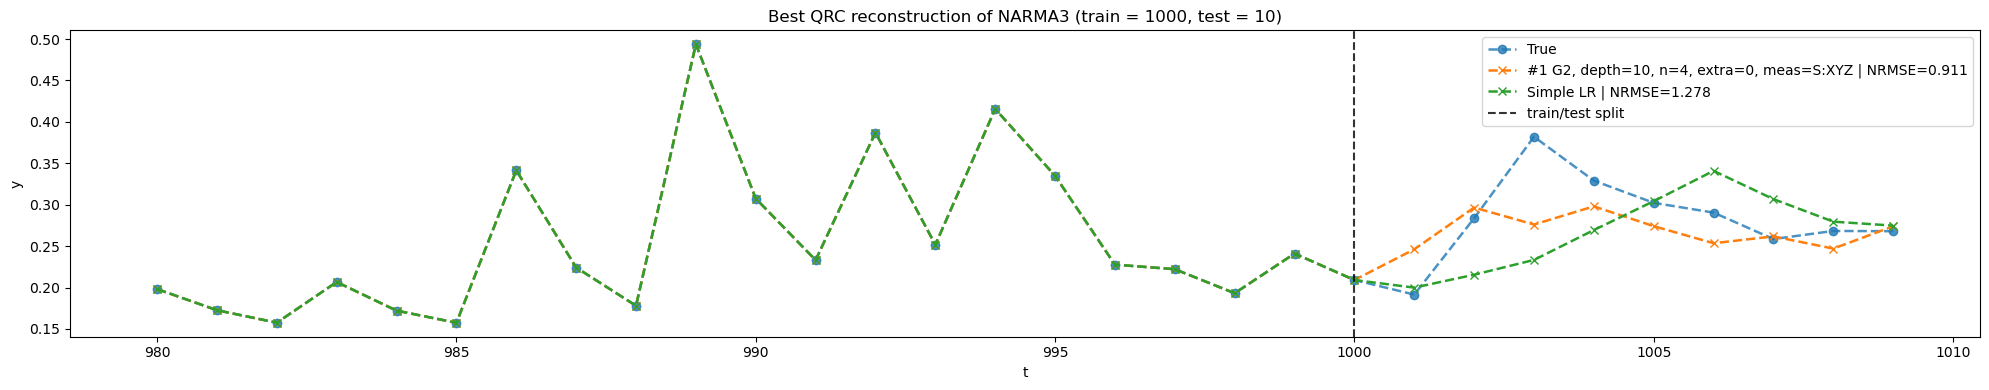

In [20]:
file_path_narma3_B = "datas/Classical_Datasets/narma/G/3B.txt"
narma3_best_params_B, narma3_worst_params_B = OP.recompute_best_worst_from_logfile(file_path_narma3_B, y_narma3[:T_narma_B], T_narma_train_B, T_narma_test_B, nb_input_qubits = 1, k=1, is_dataset_classical=True) 
OP.plot_ranked_predictions(narma3_best_params_B[:1],T_train=T_narma_train_B,title="Best QRC reconstruction of NARMA3 (train = 1000, test = 10)", steps_training_included=20, y_lr=narma3_LR_B)

### NARMA5

In [21]:
narma5_LR_A, y_true, W, X_train, Y_train = TP.predict_linear_regression(y_narma5[:T_narma_A], T_narma_train_A, T_narma_test_A, 5)

In [ ]:
narma5_best_params_A, narma5_worst_params_A = OP.find_optimal_res_sliding_window_classical_dataset(y_narma5[:T_narma_A], T_narma_train_A, T_narma_test_A, nb_input_qubits = 1, 
                                                                                                sliding_window_size_range=(4,6), 
                                                                                                nb_extra_qubits_range=(0,1), 
                                                                                                seeds=[0,1], 
                                                                                                try_res_G=True,
                                                                                                try_res_MG=False,
                                                                                                try_res_D=False,
                                                                                                try_res_ISING=False,
                                                                                                try_Rz=True,
                                                                                                depths_G=[3, 5, 10])

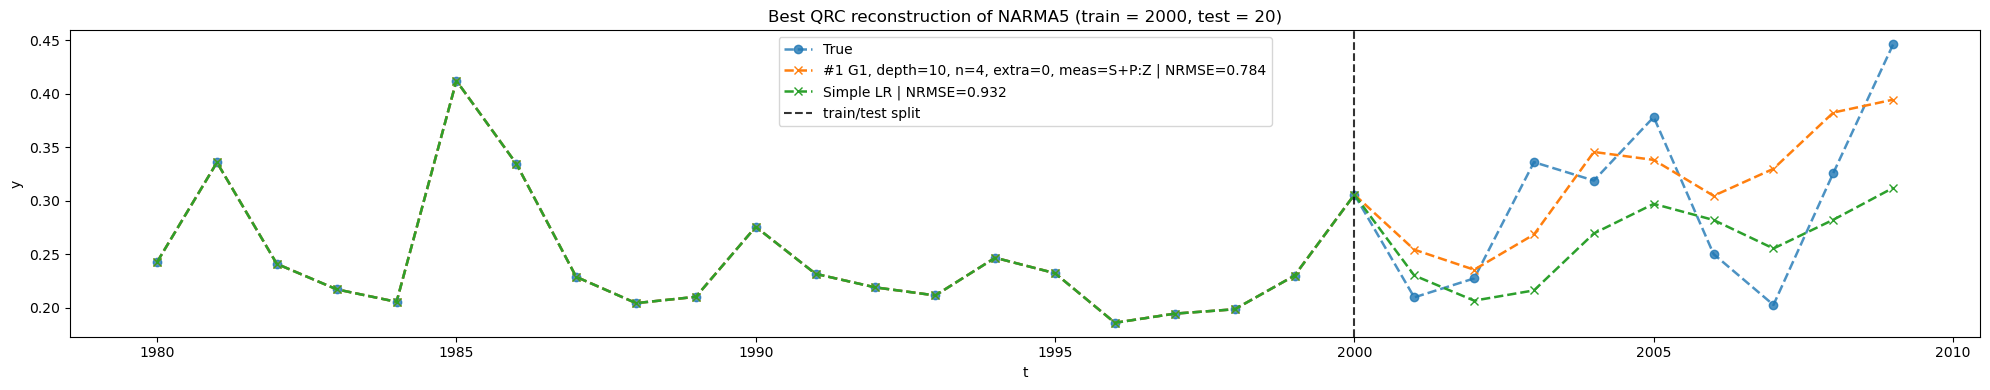

In [27]:
file_path_narma5_A = "datas/Classical_Datasets/narma/G/5A.txt"
narma5_best_params_A, narma5_worst_params_A = OP.recompute_best_worst_from_logfile(file_path_narma5_A, y_narma5[:T_narma_A], T_narma_train_A, T_narma_test_A, nb_input_qubits = 1, k=1, is_dataset_classical=True) 
OP.plot_ranked_predictions(narma5_best_params_A[:1],T_train=T_narma_train_A,title="Best QRC reconstruction of NARMA5 (train = 2000, test = 20)", steps_training_included=20, y_lr=narma5_LR_A)

In [28]:
narma5_LR_B, y_true, W, X_train, Y_train = TP.predict_linear_regression(y_narma5[:T_narma_B], T_narma_train_B, T_narma_test_B, 5)

In [ ]:
narma5_best_params_B, narma5_worst_params_B = OP.find_optimal_res_sliding_window_classical_dataset(y_narma5[:T_narma_B], T_narma_train_B, T_narma_test_B, nb_input_qubits = 1, 
                                                                                                sliding_window_size_range=(4,6), 
                                                                                                nb_extra_qubits_range=(0,1), 
                                                                                                seeds=[0,1], 
                                                                                                try_res_G=True,
                                                                                                try_res_MG=False,
                                                                                                try_res_D=False,
                                                                                                try_res_ISING=False,
                                                                                                try_Rz=True,
                                                                                                depths_G=[3, 5, 10])

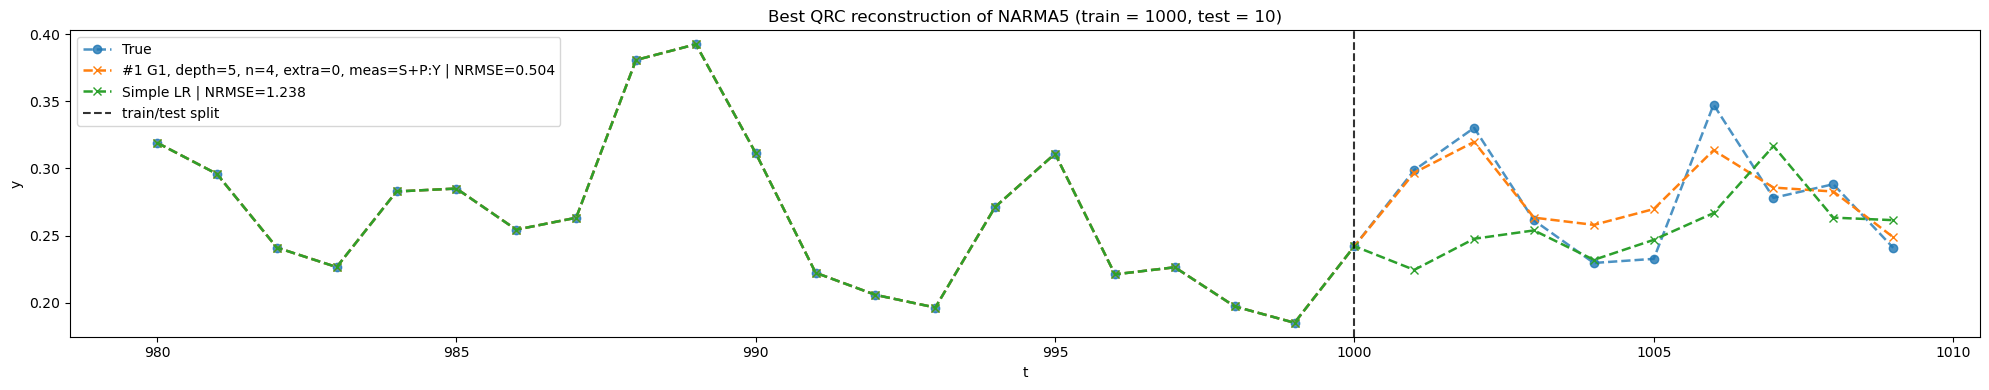

In [29]:
file_path_narma5_B = "datas/Classical_Datasets/narma/G/5B.txt"
narma5_best_params_B, narma5_worst_params_B = OP.recompute_best_worst_from_logfile(file_path_narma5_B, y_narma5[:T_narma_B], T_narma_train_B, T_narma_test_B, nb_input_qubits = 1, k=1, is_dataset_classical=True) 
OP.plot_ranked_predictions(narma5_best_params_B[:1],T_train=T_narma_train_B,title="Best QRC reconstruction of NARMA5 (train = 1000, test = 10)", steps_training_included=20, y_lr=narma5_LR_B)

-----


## 2.2. Tomato price

(https://www.kaggle.com/datasets/ramkrijal/tomato-daily-prices)

max available datas: 2741.

#### Daily price

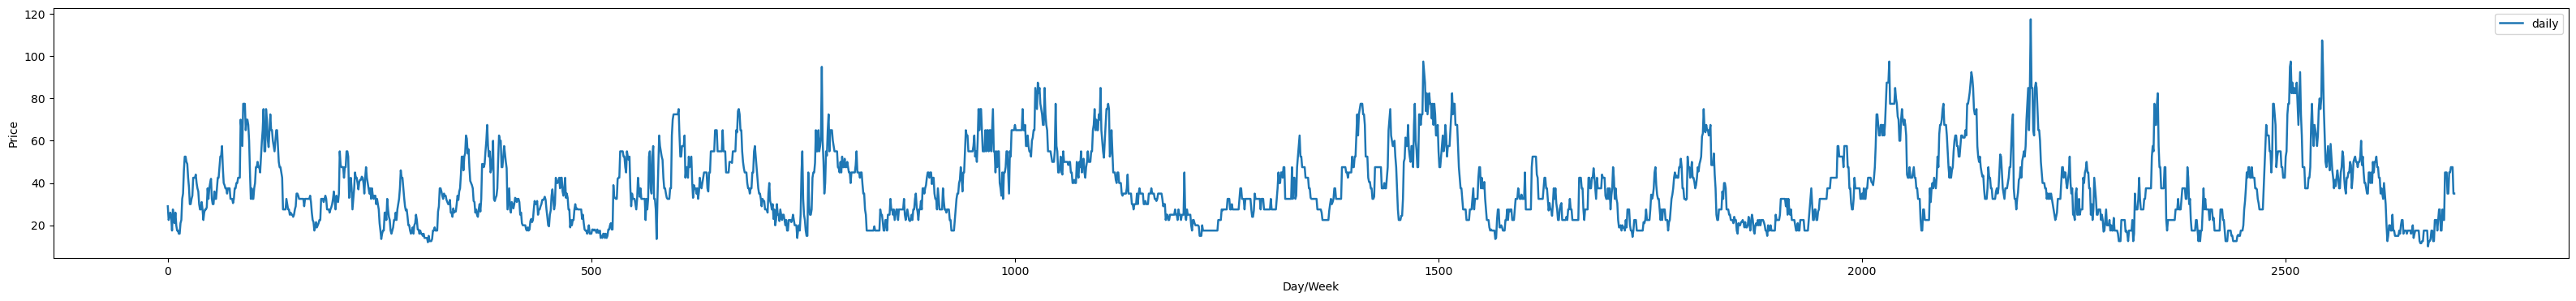

In [44]:
T_daily = 2700
days_per_week = 7
T_weekly = 2700 // days_per_week

y_tomato_daily = DT.tomato_dataset(T_daily)
y_tomato_weekly = np.array([
    np.mean(y_tomato_daily[i*days_per_week:(i+1)*days_per_week])
    for i in range(T_weekly)
])


plt.figure(figsize=(40, 4))
plt.plot(y_tomato_daily, label="daily", lw=1.8)
#plt.plot(y_tomato_weekly, label="weekly", lw=1.8)
plt.legend()
#plt.title(f"Spanish tomato daily/weekly price (2013 to 2021)")
plt.xlabel("Day/Week")
plt.ylabel("Price")
plt.show()

In [34]:
T_tomato_test = 10

T_tomato_train_daily_A = T_daily - T_tomato_test
T_tomato_train_daily_B = T_weekly - T_tomato_test

T_tomato_train_weekly = T_tomato_train_daily_B

### Daily Price


In [35]:
tomato_LR_daily_A = []
nrmse_d = np.inf
n_d = 0

for i in range(1,7):
    y_lr, y_true, W, X_train, Y_train = TP.predict_linear_regression(y_tomato_daily[:T_daily], T_tomato_train_daily_A, T_tomato_test, i)
    err = OP.NRMSE(y_tomato_daily[:T_daily], y_lr)
    if err < nrmse_d:
        nrmse_d = err
        n_d = i
        tomato_LR_daily_A = y_lr
print(f"best order: {n_d}")

best order: 5


In [ ]:
tomato_best_params_daily, tomato_worst_params_daily = OP.find_optimal_res_sliding_window_classical_dataset(y_tomato_daily[:T_daily], T_tomato_train_daily_A, T_tomato_test, nb_input_qubits = 1, 
                                                                                                sliding_window_size_range=(2,5), 
                                                                                                nb_extra_qubits_range=(0,1), 
                                                                                                seeds=[0,1], 
                                                                                                try_res_G=True,
                                                                                                try_res_MG=True,
                                                                                                try_res_D=True,
                                                                                                try_res_ISING=True,
                                                                                                try_Rz=False,
                                                                                                meas_SZ = False,
                                                                                                depths_G=[3, 10])

In [ ]:
tomato_best_params_daily_A, tomato_worst_params_daily_A = OP.find_optimal_res_sliding_window_classical_dataset(y_tomato_daily[:T_daily], T_tomato_train_daily_A, T_tomato_test, nb_input_qubits = 1, 
                                                                                                sliding_window_size_range=(4,6), 
                                                                                                nb_extra_qubits_range=(0,2), 
                                                                                                seeds=[0,1], 
                                                                                                try_res_G=True,
                                                                                                try_res_MG=False,
                                                                                                try_res_D=False,
                                                                                                try_res_ISING=False,
                                                                                                try_Rz=True,
                                                                                                depths_G=[3, 5, 10])

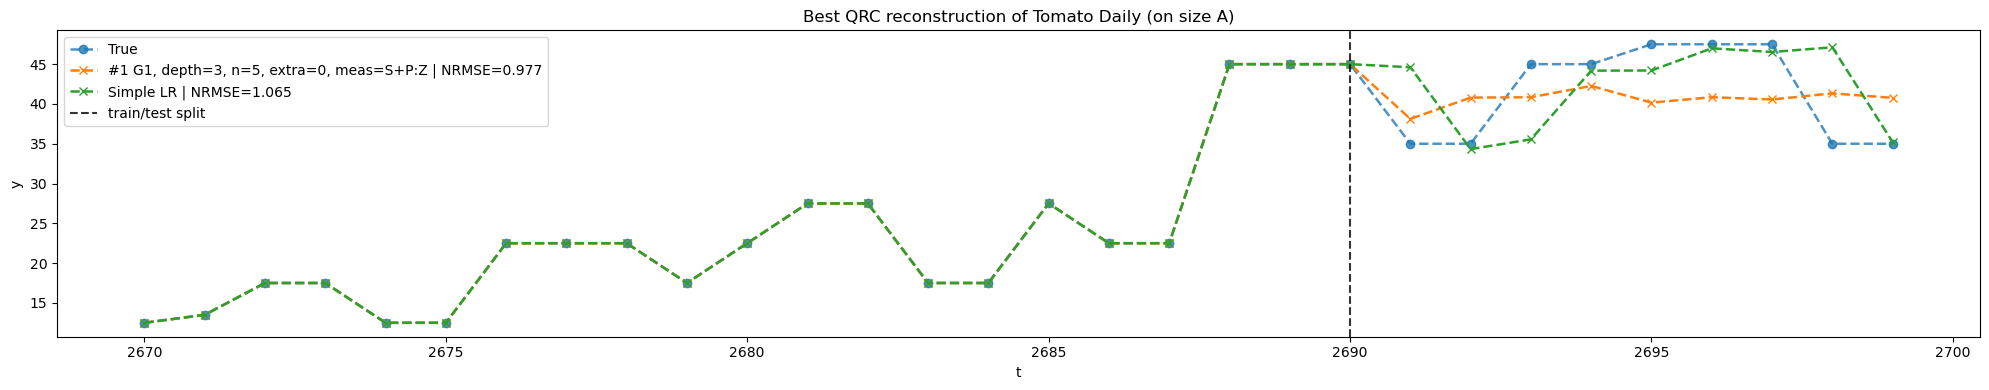

In [36]:
file_path_tomato_daily_A = "datas/Classical_Datasets/tomato/G/dailyA.txt"
tomato_best_params_daily_A, tomato_worst_params_daily_A = OP.recompute_best_worst_from_logfile(file_path_tomato_daily_A, y_tomato_daily[:T_daily], T_tomato_train_daily_A, T_tomato_test, nb_input_qubits = 1, k=1, is_dataset_classical=True) 
OP.plot_ranked_predictions(tomato_best_params_daily_A[:1],T_train=T_tomato_train_daily_A,title="Best QRC reconstruction of Tomato Daily (on size A)", steps_training_included=20, y_lr=tomato_LR_daily_A)

In [37]:
tomato_LR_daily_B = []
nrmse_d_b = np.inf
n_d_b = 0

for i in range(1,7):
    y_lr, y_true, W, X_train, Y_train = TP.predict_linear_regression(y_tomato_daily[:T_weekly], T_tomato_train_daily_B, T_tomato_test, i)
    err = OP.NRMSE(y_tomato_daily[:T_weekly], y_lr)
    if err < nrmse_d_b:
        nrmse_d_b = err
        n_d_b = i
        tomato_LR_daily_B = y_lr
print(f"best order: {n_d_b}")

best order: 3


In [ ]:
tomato_best_params_daily_B, tomato_worst_params_daily_B = OP.find_optimal_res_sliding_window_classical_dataset(y_tomato_daily[:T_weekly], T_tomato_train_daily_B, T_tomato_test, nb_input_qubits = 1, 
                                                                                                sliding_window_size_range=(4,6), 
                                                                                                nb_extra_qubits_range=(0,2), 
                                                                                                seeds=[0,1], 
                                                                                                try_res_G=True,
                                                                                                try_res_MG=False,
                                                                                                try_res_D=False,
                                                                                                try_res_ISING=False,
                                                                                                try_Rz=True,
                                                                                                depths_G=[3, 5, 10])

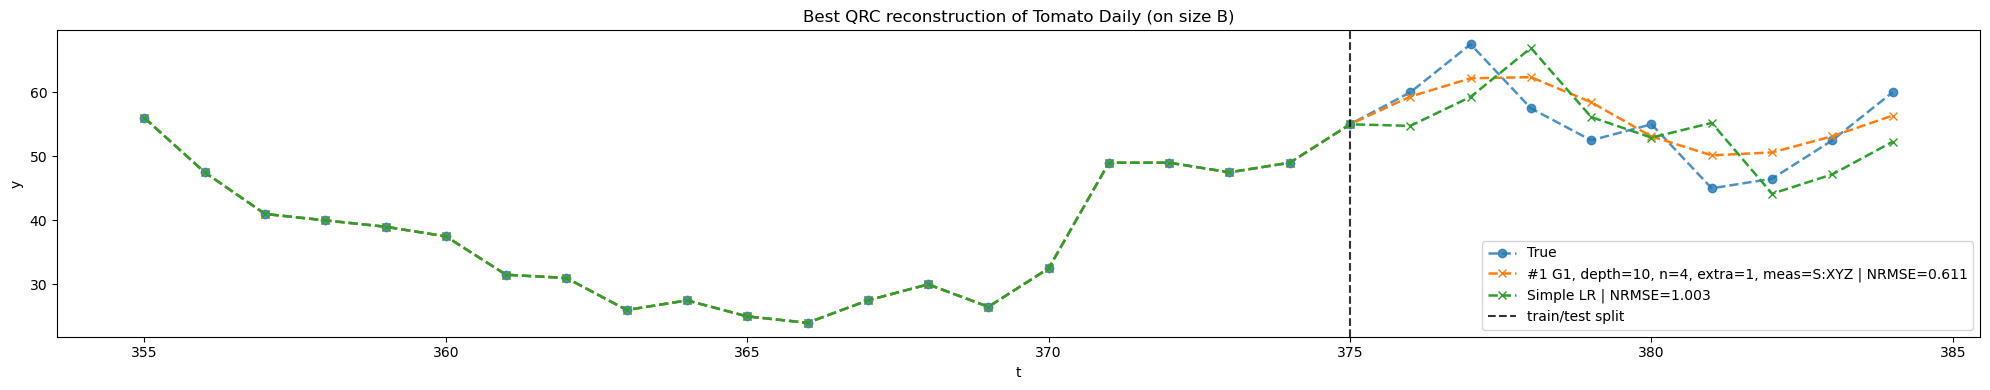

In [38]:
file_path_tomato_daily_B = "datas/Classical_Datasets/tomato/G/dailyB.txt"
tomato_best_params_daily_B, tomato_worst_params_daily_B = OP.recompute_best_worst_from_logfile(file_path_tomato_daily_B, y_tomato_daily[:T_weekly], T_tomato_train_daily_B, T_tomato_test, nb_input_qubits = 1, k=1, is_dataset_classical=True) 
OP.plot_ranked_predictions(tomato_best_params_daily_B[:1],T_train=T_tomato_train_daily_B,title="Best QRC reconstruction of Tomato Daily (on size B)", steps_training_included=20, y_lr=tomato_LR_daily_B)

#### Weekly price

In [39]:
tomato_LR_weekly = []
nrmse_w = np.inf
n_w = 0

for i in range(1,7):
    y_lr, y_true, W, X_train, Y_train = TP.predict_linear_regression(y_tomato_weekly[:T_weekly], T_tomato_train_weekly, T_tomato_test, i)
    err = OP.NRMSE(y_tomato_weekly[:T_weekly], y_lr)
    if err < nrmse_w:
        nrmse_w = err
        n_w = i
        tomato_LR_weekly = y_lr
print(f"best order: {n_w}")

best order: 2


In [ ]:
tomato_best_params_weekly_all, tomato_worst_params_weekly_all = OP.find_optimal_res_sliding_window_classical_dataset(y_tomato_weekly[:T_weekly], T_tomato_train_weekly, T_tomato_test, nb_input_qubits = 1,
                                                                                                sliding_window_size_range=(2,5), 
                                                                                                nb_extra_qubits_range=(0,1), 
                                                                                                seeds=[0,1], 
                                                                                                try_res_G=True,
                                                                                                try_res_MG=True,
                                                                                                try_res_D=True,
                                                                                                try_res_ISING=True,
                                                                                                try_Rz=False,
                                                                                                meas_SZ = False,
                                                                                                depths_G=[3, 10])

In [ ]:
tomato_best_params_weekly, tomato_worst_params_weekly = OP.find_optimal_res_sliding_window_classical_dataset(y_tomato_weekly[:T_weekly], T_tomato_train_weekly, T_tomato_test, nb_input_qubits = 1, 
                                                                                                sliding_window_size_range=(4,6), 
                                                                                                nb_extra_qubits_range=(0,2), 
                                                                                                seeds=[0,1], 
                                                                                                try_res_G=True,
                                                                                                try_res_MG=False,
                                                                                                try_res_D=False,
                                                                                                try_res_ISING=False,
                                                                                                try_Rz=True,
                                                                                                depths_G=[3, 5, 10])

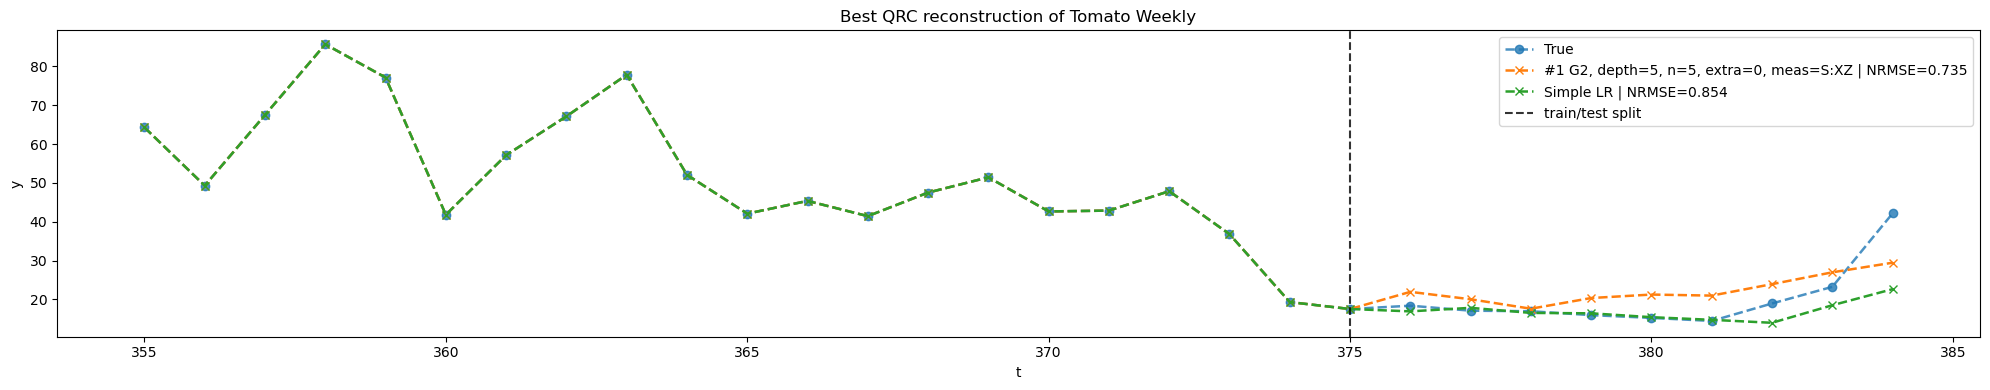

In [41]:
file_path_tomato_weekly = "datas/Classical_Datasets/tomato/G/weekly.txt"
tomato_best_params_weekly, tomato_worst_params_weekly = OP.recompute_best_worst_from_logfile(file_path_tomato_weekly, y_tomato_weekly[:T_weekly], T_tomato_train_weekly, T_tomato_test, nb_input_qubits = 1, k=1, is_dataset_classical=True) 
OP.plot_ranked_predictions(tomato_best_params_weekly[:1],T_train=T_tomato_train_weekly,title="Best QRC reconstruction of Tomato Weekly", steps_training_included=20, y_lr=tomato_LR_weekly)

----
----